# Exploratory data analysis (EDA)
---

### ¿Qué es?

Es cuando revisamos por primera vez los datos que nos llegan, por ejemplo un archivo CSV que nos entregan y deberemos intentar comprender **¿de qué se trata?**, vislumbrar posibles patrones y reconociendo distribuciones estadísticas que puedan ser útiles en el futuro.

Lo ideal es que tengamos un objetivo que nos hayan *“adjuntado”* con los datos, que indique lo que se quiere conseguir a partir de esos datos. Por ejemplo, nos pasan un excel y nos dicen *“Queremos predecir ventas a 30 días”*, ó *“Clasificar casos malignos/benignos de una enfermedad”*, *“Queremos identificar audiencias que van a realizar re-compra de un producto”*, *“queremos hacer pronóstico de fidelización de clientes/abandonos”*, *“Quiero detectar casos de fraude en mi sistema en tiempo real”*.

### ¿Que hacer cuando llegar un archivo?

- ¿Cuántos registros hay?
    - ¿Son demasiado pocos?
    - ¿Son muchos y no tenemos Capacidad (CPU+RAM) suficiente para procesarlo?
- ¿Están todas las filas completas ó tenemos campos con valores nulos?
    - En caso que haya demasiados nulos: ¿Queda el resto de información inútil?
- ¿Que datos son discretos y cuales continuos?
    - Muchas veces sirve obtener el tipo de datos: texto, int, double, float
- Si es un problema de tipo supervisado:
    - ¿Cuál es la columna de “salida”? ¿binaria, multiclase?
    - ¿Esta balanceado el conjunto salida?
- ¿Cuales parecen ser features importantes? ¿Cuales podemos descartar?
- ¿Siguen alguna distribución?
- ¿Hay correlación entre features (características)?
- En problemas de NLP es frecuente que existan categorías repetidas ó mal tipeadas, ó con mayusculas/minúsculas, singular y plural, por ejemplo “Abogado” y “Abogadas”, “avogado” pertenecerían todos a un mismo conjunto.
- ¿Estamos ante un problema dependiente del tiempo? Es decir un TimeSeries.
- Si fuera un problema de Visión Artificial: ¿Tenemos suficientes muestras de cada clase y variedad, para poder hacer generalizar un modelo de Machine Learning?
- ¿Cuales son los Outliers? (unos pocos datos aislados que difieren drásticamente del resto y “contaminan” ó desvían las distribuciones)
    - Podemos eliminarlos? es importante conservarlos?
    - son errores de carga o son reales?
- ¿Tenemos posible sesgo de datos? (por ejemplo perjudicar a clases minoritarias por no incluirlas y que el modelo de ML discrimine)


### **Ejemplo:** de analisis exploratorio de datos

**Importar librerías**

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [8]:
%matplotlib inline

plt.style.use('bmh')

In [9]:
df = pd.read_csv('datasets/train.csv')

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [18]:
# df.count() does not include NaN values
df2 = df[[column for column in df if df[column].count() / len(df) >= 0.3]]
del df2['Id']
df3 = df2
df2.head()

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [19]:
for c in df.columns:
    if c not in df2.columns:
        print(c)       

Id
LotFrontage
Alley
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond
PoolQC
Fence
MiscFeature


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


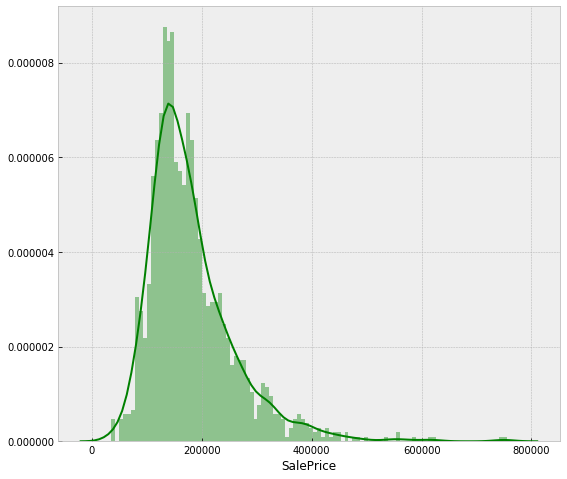

In [20]:
print(df['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [21]:
list(set(df.dtypes.tolist()))

[dtype('O'), dtype('int64'), dtype('float64')]

In [22]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


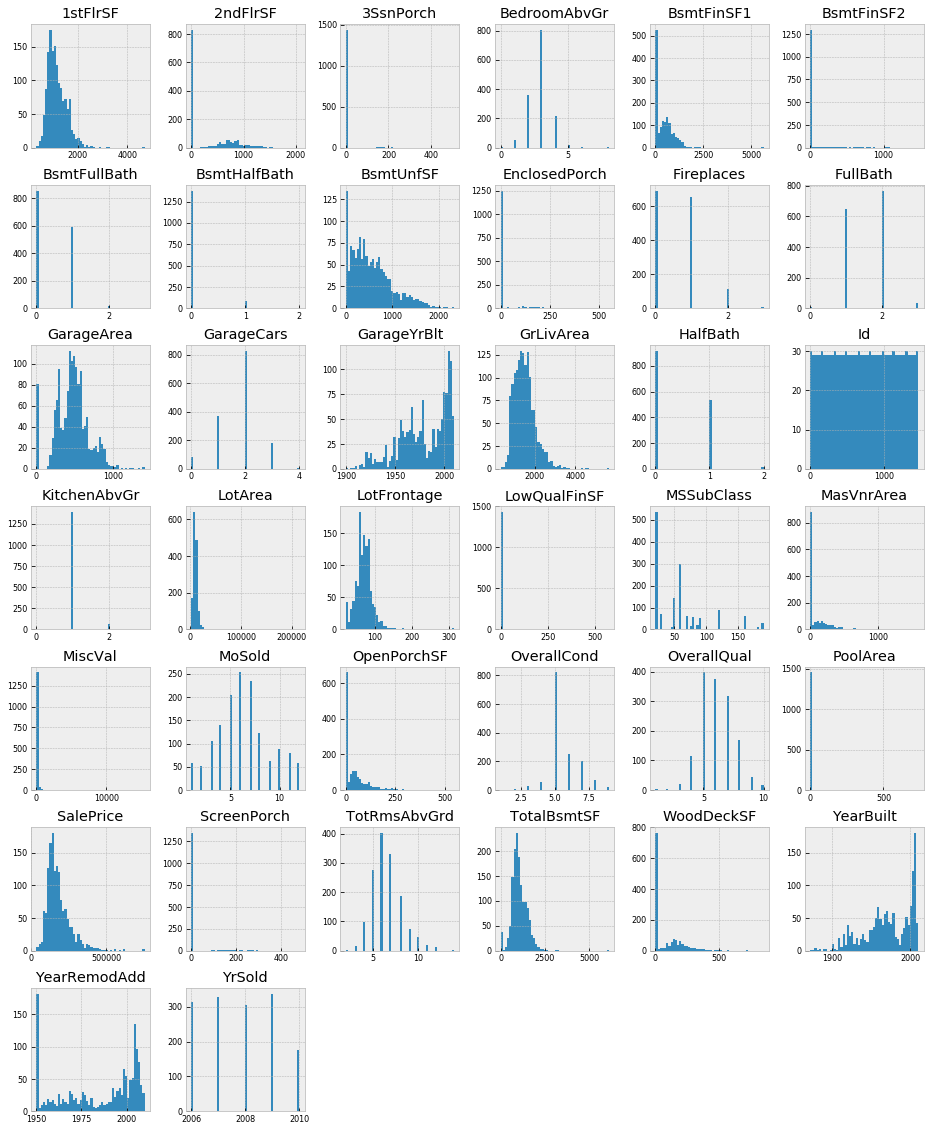

In [23]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Características como `1stFlrSF`,` TotalBsmtSF`, `LotFrontage`,` GrLiveArea` ... parecen compartir una distribución similar a la que tenemos con `SalePrice`. Veamos si podemos encontrar nuevas pistas más tarde.

Ahora intentaremos encontrar qué características están fuertemente correlacionadas con SalePrice. Los almacenaremos en una var llamada golden_features_list. Reutilizaremos nuestro conjunto de datos df_num para hacerlo.

In [24]:
df_num_corr = df_num.corr()['SalePrice'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Perfecto, ahora tenemos una lista de valores fuertemente correlacionados, pero esta lista está incompleta ya que sabemos que la correlación se ve afectada por valores atípicos. Entonces podríamos proceder de la siguiente manera:

Trace las características numéricas y vea cuáles tienen muy pocos valores atípicos explicables.
Elimine los valores atípicos de estas características y vea cuál puede tener una buena correlación sin sus valores atípicos

Por cierto, la correlación por sí misma no siempre explica la relación entre los datos, por lo que trazarlos incluso podría llevarnos a nuevos conocimientos y, de la misma manera, verificar que nuestros valores correlacionados tengan una relación lineal con el precio de venta.

Por ejemplo, relaciones como la relación curvilínea no se pueden adivinar con solo mirar el valor de correlación, así que tomemos las características que excluimos de nuestra tabla de correlación y grafíquelas para ver si muestran algún tipo de patrón.

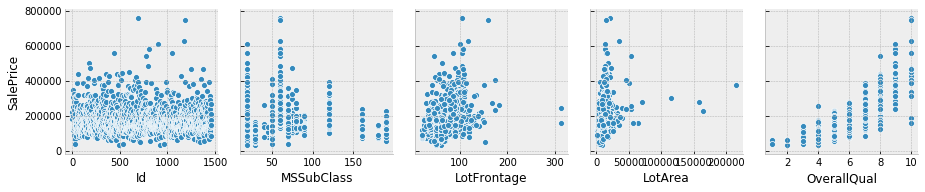

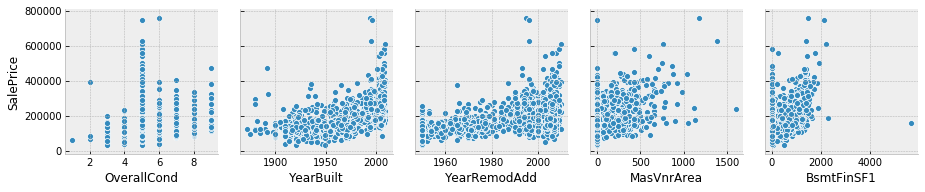

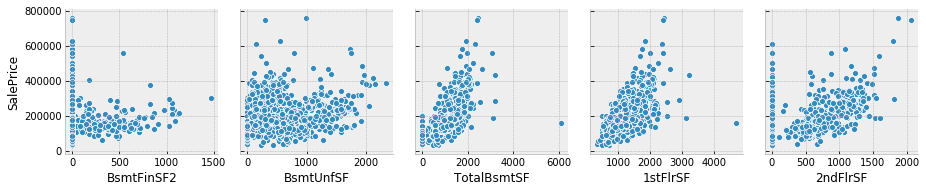

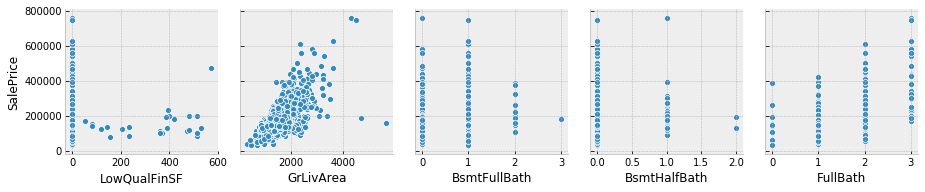

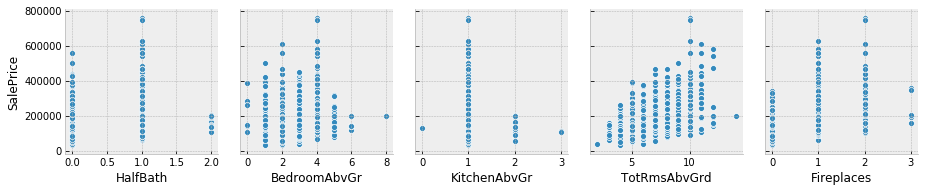

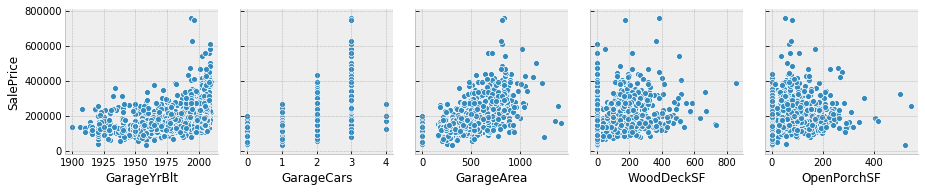

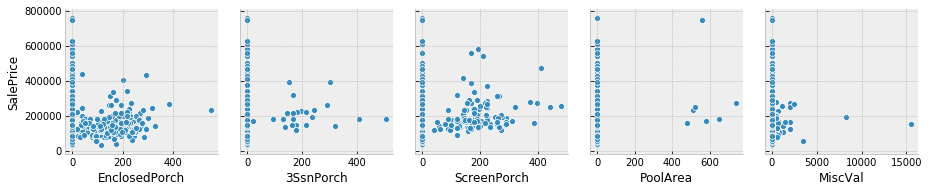

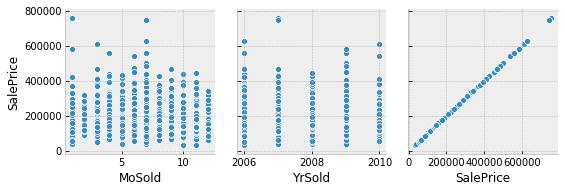

In [25]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+5],
                y_vars=['SalePrice'])

Podemos identificar claramente algunas relaciones. La mayoría de ellos parece tener una relación lineal con SalePrice y si miramos de cerca los datos, podemos ver que muchos puntos de datos se encuentran en x = 0, lo que puede indicar la ausencia de dicha característica en la casa.

Tome OpenPorchSF, dudo que todas las casas tengan un porche (la mía no, por ejemplo, pero no pierdo la esperanza de que algún día ... sí, algún día ...).

In [26]:
import operator

individual_features_df = []
for i in range(0, len(df_num.columns) - 1): # -1 because the last column is SalePrice
    tmpDf = df_num[[df_num.columns[i], 'SalePrice']]
    tmpDf = tmpDf[tmpDf[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDf)

all_correlations = {feature.columns[0]: feature.corr()['SalePrice'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

   KitchenAbvGr: -0.139200692178
       HalfBath: -0.0843917112718
     MSSubClass: -0.0842841351266
    OverallCond: -0.0778558940487
         YrSold: -0.0289225851687
   BsmtHalfBath: -0.0288345671855
             Id: -0.0219167194434
       PoolArea: -0.0140915215064
   BsmtFullBath: 0.0114391633404
         MoSold: 0.0464322452238
      3SsnPorch: 0.0639324325689
    OpenPorchSF: 0.0864529885715
        MiscVal:  0.088963389173
     Fireplaces:  0.121660584214
      BsmtUnfSF:  0.169261000495
   BedroomAbvGr:  0.180936693108
     WoodDeckSF:  0.193706012375
     BsmtFinSF2:  0.198956094308
  EnclosedPorch:  0.241278836301
    ScreenPorch:  0.255430079549
        LotArea:  0.263843353871
   LowQualFinSF:  0.300075016555
    LotFrontage:  0.351799096571
     MasVnrArea:  0.434090219757
     BsmtFinSF1:  0.471690426524
    GarageYrBlt:  0.486361677488
   YearRemodAdd:  0.507100967111
      YearBuilt:  0.522897332879
   TotRmsAbvGrd:  0.533723155582
       FullBath:  0.574562673776
   

¡Muy interesante! Encontramos otro valor fuertemente correlacionado limpiando un poco los datos. Ahora nuestra var golden_features_list se ve así:

In [27]:
golden_features_list = [key for key, value in all_correlations if abs(value) >= 0.5]
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 11 strongly correlated values with SalePrice:
['YearRemodAdd', 'YearBuilt', 'TotRmsAbvGrd', 'FullBath', '1stFlrSF', 'GarageArea', 'TotalBsmtSF', 'GarageCars', '2ndFlrSF', 'GrLivArea', 'OverallQual']


Encontramos predictores fuertemente correlacionados con "SalePrice". Más adelante, con la ingeniería de características, podemos agregar valores ficticios donde el valor de una característica dada> 0 sería 1 (precedencia de dicha característica) y 0 sería 0.
Para `2ndFlrSF`, por ejemplo, podríamos crear un valor ficticio para su precienso o no precenso y finalmente sumarlo a` 1stFlrSF`.

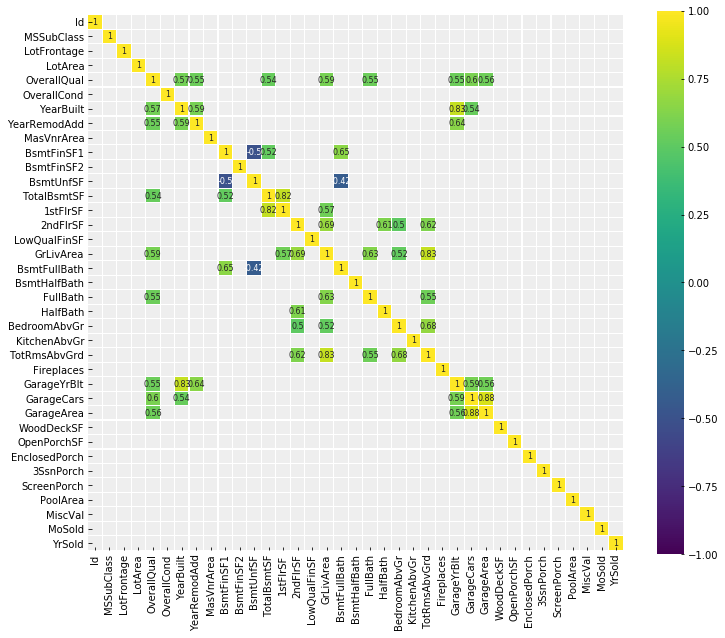

In [28]:
corr = df_num.drop('SalePrice', axis=1).corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Muchas características parecen estar correlacionadas entre sí, pero algunas de ellas, como YearBuild / GarageYrBlt, pueden indicar una inflación de precios a lo largo de los años. En cuanto a 1stFlrSF / TotalBsmtSF, es normal que cuanto más grande sea el primer piso (considerando que muchas casas tienen solo 1 piso), más grande será el sótano total.

Ahora, para los que son menos obvios, podemos ver que:

- Existe una fuerte correlación negativa entre BsmtUnfSF (pies cuadrados sin terminar de área de sótano) y BsmtFinSF2 (pies cuadrados terminados tipo 2). Aquí hay una definición de pies cuadrados sin terminar, pero en cuanto a una casa de "Tipo 2", no puedo decir qué es realmente.

- HalfBath / 2ndFlrSF es interesante y puede indicar que la gente le da una importancia a no tener que bajar corriendo las escaleras en caso de tener que ir al baño urgentemente (lo consideraré cuando me compre una casa uh ...)

Por supuesto, hay mucho más por descubrir, pero realmente no puedo explicar el resto de las características, excepto las más obvias.

Podemos concluir que, en esencia, algunas de esas características pueden combinarse entre sí para reducir el número de características (`1stFlrSF` /` TotalBsmtSF`, `GarageCars` /` GarageArea`) y otras indican que las personas esperan múltiples características para ser empaquetadas juntas.

Examinemos ahora las características cuantitativas de nuestro marco de datos y cómo se relacionan con SalePrice, que también es cuantitativo (de ahí la relación Q -> Q). Realizaré este análisis con la ayuda del capítulo Q -> Q del MOOC de Standford

Algunas de las características de nuestro conjunto de datos son categóricas. Para separar las características categóricas de las cuantitativas, consulte el archivo data_description.txt. De acuerdo con este archivo, terminamos con las siguientes columnas:

In [29]:
quantitative_features_list = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 
                              '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 
                              'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
                              'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
                              'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']
df_quantitative_values = df[quantitative_features_list]
df_quantitative_values.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,196.0,706,0,856,856,854,0,1710,...,2,548,0,61,0,0,0,0,0,208500
1,80.0,9600,0.0,978,0,1262,1262,0,0,1262,...,2,460,298,0,0,0,0,0,0,181500
2,68.0,11250,162.0,486,0,920,920,866,0,1786,...,2,608,0,42,0,0,0,0,0,223500
3,60.0,9550,0.0,216,0,756,961,756,0,1717,...,3,642,0,35,272,0,0,0,0,140000
4,84.0,14260,350.0,655,0,1145,1145,1053,0,2198,...,3,836,192,84,0,0,0,0,0,250000


Aún asi, tenemos muchas características para analizar aquí, así que tomemos las características cuantitativas fuertemente correlacionadas de este conjunto de datos y analicémoslas una por una.

In [30]:
features_to_analyse = [x for x in quantitative_features_list if x in golden_features_list]
features_to_analyse.append('SalePrice')
features_to_analyse

['TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'FullBath',
 'TotRmsAbvGrd',
 'GarageCars',
 'GarageArea',
 'SalePrice']

Vamos a ver la distribución

In [45]:
round(len(features_to_analyse) / 3)

3.0

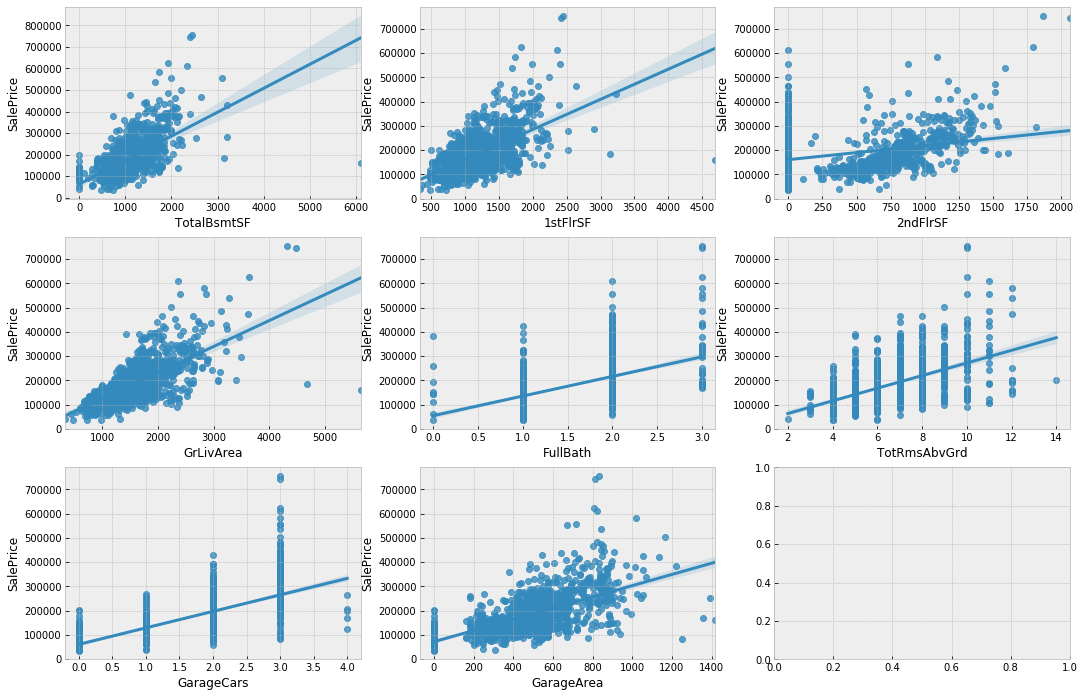

In [48]:
fig, ax = plt.subplots(len(features_to_analyse) / 3, 3, figsize = (18, 12))

for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='SalePrice', data=df[features_to_analyse], ax=ax)

Podemos ver que características como TotalBsmtSF, 1stFlrSF, GrLivArea tienen una gran difusión, pero no puedo decir qué información nos brinda esta información.

C -> Q (relación categórica a cuantitativa)

Basaremos esta parte de la exploración en el capítulo C -> Q del MOOC de Standford

Obtengamos todas las características categóricas de nuestro conjunto de datos y veamos si podemos encontrar algo de información en ellas. En lugar de volver a abrir nuestro archivo data_description.txt y verificar qué datos son categóricos, eliminemos **quantitative_features_list** de todo nuestro marco de datos.



In [49]:
# quantitative_features_list[:-1] as the last column is SalePrice and we want to keep it
categorical_features = [a for a in quantitative_features_list[:-1] + df.columns.tolist() if (a not in quantitative_features_list[:-1]) or (a not in df.columns.tolist())]
df_categ = df[categorical_features]
df_categ.head()

,Id,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,...,TA,Y,NaN,NaN,NaN,2,2008,WD,Normal,208500
1,2,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,...,TA,Y,NaN,NaN,NaN,5,2007,WD,Normal,181500
2,3,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,...,TA,Y,NaN,NaN,NaN,9,2008,WD,Normal,223500
3,4,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,...,TA,Y,NaN,NaN,NaN,2,2006,WD,Abnorml,140000
4,5,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,...,TA,Y,NaN,NaN,NaN,12,2008,WD,Normal,250000


Y no olvide las funciones no numéricas

In [50]:
df_not_num = df_categ.select_dtypes(include = ['O'])
print('There is {} non numerical features including:\n{}'.format(len(df_not_num.columns), df_not_num.columns.tolist()))

There is 43 non numerical features including:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


Al observar estas características, podemos ver que muchas de ellas son del tipo `Objeto (O)`. En nuestro cuaderno de transformación de datos podríamos usar [Funciones categóricas de Pandas] (http://pandas.pydata.org/pandas-docs/stable/categorical.html) (equivalente al factor R) para dar forma a nuestros datos de una manera que sería interpretable para nuestro algoritmo de aprendizaje automático. `ExterQual`, por ejemplo, podría transformarse en un objeto categórico ordenado.



Ahora tracemos algunos de ellos

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

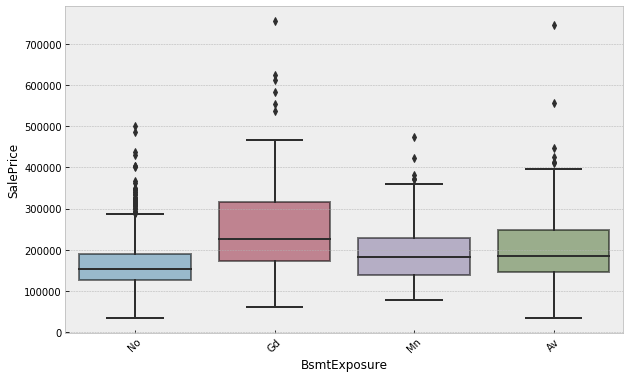

In [51]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='BsmtExposure', y='SalePrice', data=df_categ)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

Y finalmente veamos su distribución.

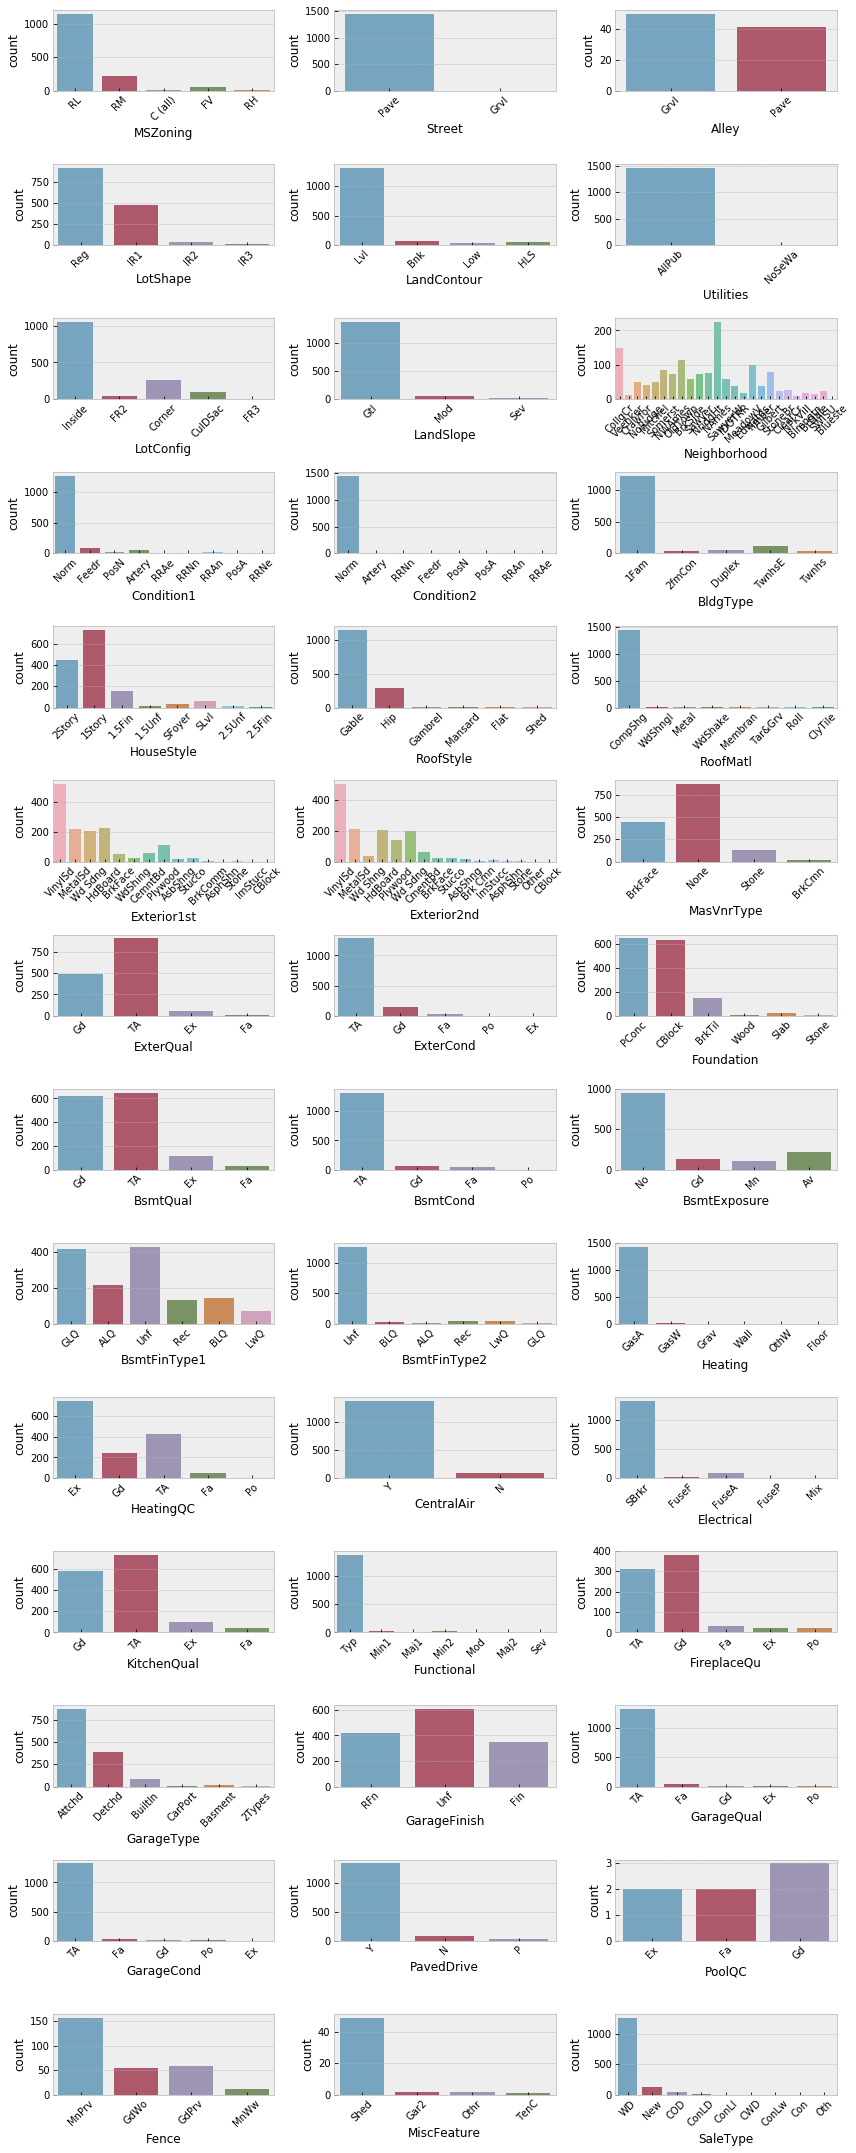

In [53]:
fig, axes = plt.subplots(len(df_not_num.columns) / 3, 3, figsize=(12, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_not_num.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_not_num.columns[i], alpha=0.7, data=df_not_num, ax=ax)

fig.tight_layout()

Podemos ver que algunas categorías son predominantes para algunas características como "Utilidades", "Calefacción", "GarageCond", "Funcional" ... Estas características pueden no ser relevantes para nuestro modelo predictivo.

### **¿Qué sacamos del EDA?**

El EDA será entonces una primer aproximación a los datos, ATENCIóN, si estamos mas o menos bien preparados y suponiendo una muestra de datos “suficiente”, puede que en “unas horas” tengamos ya varias conclusiones como por ejemplo:

- Esto que quiere hacer el cliente CON ESTOS DATOS es una locura imposible! (esto ocurre la mayoría de las veces jeje)
- No tenemos datos suficientes ó son de muy mala calidad, pedir más al cliente.
- Un modelo de tipo Arbol es lo más recomendado usar
- No hace falta usar Machine Learning para resolver lo que pide el cliente. (ESTO ES MUY IMPORTANTE!)
- Es todo tan aleatorio que no habrá manera de detectar patrones
- Hay datos suficientes y de buena calidad como para seguir a la próxima etapa.

A estas alturas podemos saber si nos están pidiendo algo viable ó si necesitamos más datos para comenzar.

Repito por si no quedó claro: el EDA debe tomar horas, ó puede que un día, pero la idea es poder sacar algunas conclusiones rápidas para contestar al cliente si podemos seguir o no con su propuesta.

Otro ejemplo de EDA en [GitHub.](https://github.com/jbagnato/machine-learning/blob/master/Ejercicio_EDA.ipynb)